In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import sparse

In [130]:
def f1(x, a, b):
    return a*x+b

In [15]:
ix1, iy1, iz1, proton_1_Fluence = np.loadtxt('Fluence.out',delimiter="\t",skiprows=1,usecols =(0, 1, 2, 4),unpack=True)

In [16]:
NX1=1
x1=np.linspace(0,NX1,NX1)
NY1=1
y1=np.linspace(0,NY1,NY1)
NZ1=300
z1=np.linspace(0,NZ1,NZ1)

In [17]:
ix1=ix1.astype(int)
iy1=iy1.astype(int)
iz1=iz1.astype(int)
coords1 = [ix1,iy1,iz1]
Fluence_map=sparse.COO(coords1,proton_1_Fluence, shape=(NX1, NY1, NZ1)).todense()

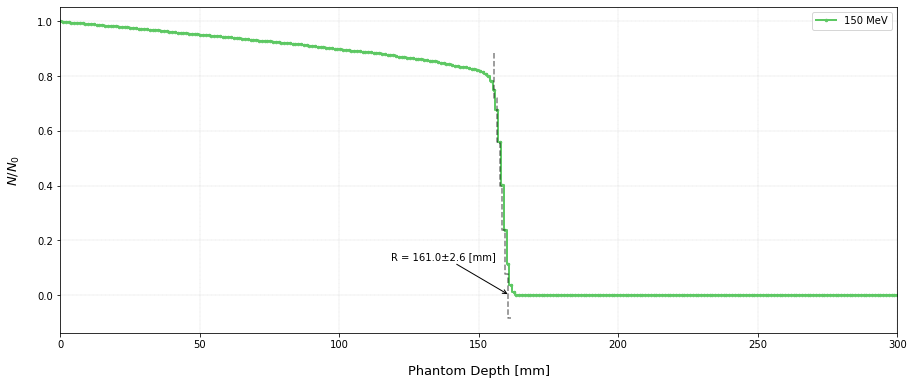

In [144]:
fig=plt.figure(figsize=(15,6))
#fig.suptitle("title", fontsize=16)

x_inter = np.linspace(0, 299, num=190, endpoint=True)

ax1=fig.add_subplot(111)
ax1.grid(linestyle='--', linewidth=0.25)
ax1.set_xlim(0,NZ1)
ax1.set_xlabel('Phantom Depth [mm]', fontsize=13,labelpad=15)
ax1.set_ylabel('$N/N_{0}$', fontsize=13,labelpad=15)
ax1.set_xscale("linear")
ax1.set_yscale("linear")

# Proton dose data
data1=Fluence_map[0,0,:]/np.max(Fluence_map[0,0,:])
ax1.step(z1,data1, linestyle="-",where="mid",linewidth=2, label='150 MeV', marker='.', color="#5DC863FF", ms=5)
zlim0 = np.argwhere(data1<0.6)[0][0]
zlim1 = np.argwhere(data1>0.1)[-1][0]
popt, pcov = curve_fit(f1, z1[zlim0:zlim1], data1[zlim0:zlim1])
ax1.step(z1[zlim0-2:zlim1+2], f1(z1[zlim0-2:zlim1+2], *popt), '--', linewidth=1.5, color="black", alpha=0.5)

R=round(-popt[1]/popt[0],1)
perr = np.sqrt(np.diag(pcov))
R_err = round(abs(perr[0]/popt[0])+abs(perr[1]/popt[1])*R,1)

ax1.annotate('R = '+str(R)+"±"+str(R_err)+' [mm]', (R, 0.00),
            xytext=(0.52, 0.25), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",facecolor='#21908CFF'),
            fontsize=10,
            horizontalalignment='right', verticalalignment='top')

ax1.legend(loc='best')